In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
df = pd.read_csv("C:\\Users\\Arpit Kadam\\Desktop\\US Visa Approval\\data\\EasyVisa.csv")

# Display the first few rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
# Check basic information about the dataset
print("Dataset shape:", df.shape)
print()
print("\
Data types:")
print(df.dtypes)
print()
print("\
Missing values:")
print(df.isnull().sum())
print()
print("\
Basic statistics:")
print(df.describe())

Dataset shape: (25480, 12)

Data types:
case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

Missing values:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Basic statistics:
       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877

  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  company_age  \
0         592.2029         Hour                  Y      Denied     

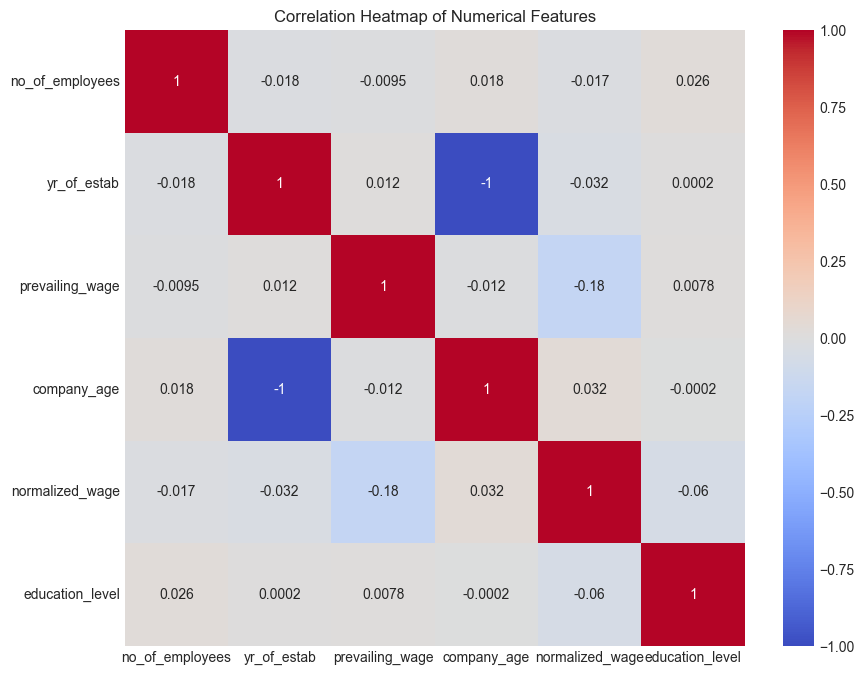

Feature Engineering complete.


In [6]:
# Feature Engineering
# 1. Create a company age feature (age = current_year (2025) - yr_of_estab)
current_year = 2025

# Check if yr_of_estab is proper; if any anomalies then fix them maybe but we assume it's fine.
df['company_age'] = current_year - df['yr_of_estab']

# 2. Normalize prevailing wage to a yearly wage based on the unit_of_wage
# if unit is 'Hour', multiply by 2080 (assuming full-time hours)
# if unit is 'Year', keep the value

def normalize_wage(row):
    if row['unit_of_wage'] == 'Hour':
        return row['prevailing_wage'] * 2080
    else:
        return row['prevailing_wage']

# apply function

df['normalized_wage'] = df.apply(normalize_wage, axis=1)

# 3. Convert categorical boolean features (has_job_experience, requires_job_training, full_time_position) from 'Y'/'N' to 1/0
binary_columns = ['has_job_experience', 'requires_job_training', 'full_time_position']
for col in binary_columns:
    df[col + '_binary'] = df[col].map({'Y': 1, 'N': 0})

# 4. Convert education of employee into ordered categories. Let's assume ordering ["High School", "Bachelor's", "Master's", "Doctorate"] if applicable
# However, dataset may not contain Doctorate, but we'll add anyway. We'll create an ordinal encoding.

education_order = {"High School": 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4}

df['education_level'] = df['education_of_employee'].map(education_order)

# Display the first few rows after feature engineering
print(df.head())

# Plot a correlation heatmap for numerical features, including our engineered ones
numeric_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'company_age', 'normalized_wage', 'education_level']

plt.figure(figsize=(10,8))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig("visualization_images/Correlation Heatmap of Numerical Features.png")
plt.show()

print('Feature Engineering complete.')

C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\2425622163.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='case_status', data=df, ax=axes[1,0], palette='viridis')
C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\2425622163.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region_of_employment', data=df, ax=axes[1,1], palette='magma')


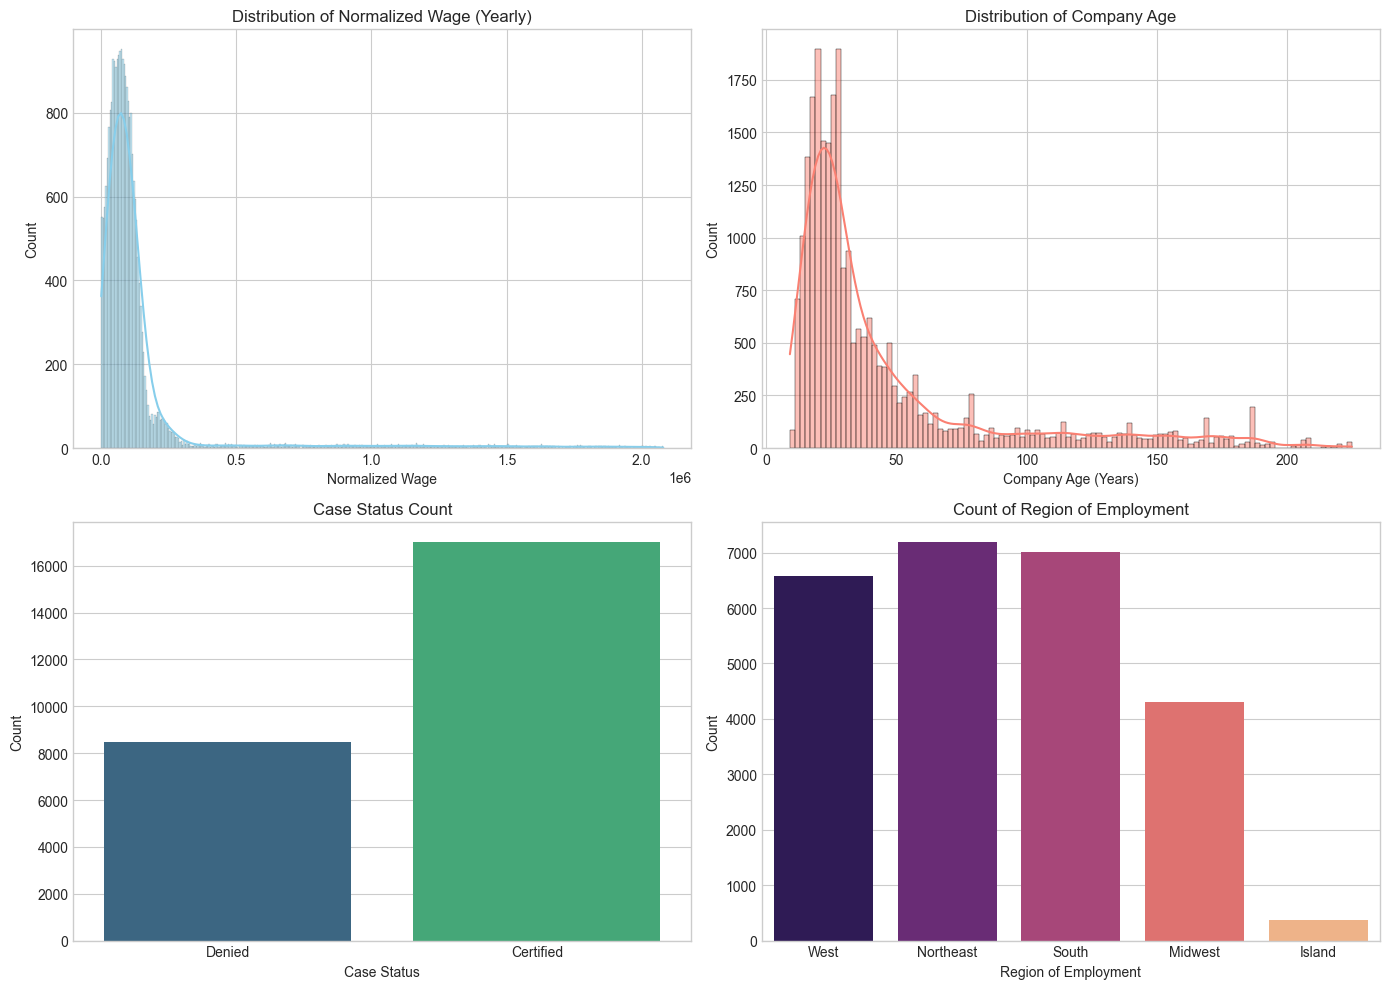

Additional EDA Visualizations complete.


In [7]:
# Additional Analysis and Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Creating subplots for various distributions and count plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribution of normalized wage (yearly)
sns.histplot(df['normalized_wage'], kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution of Normalized Wage (Yearly)')
axes[0,0].set_xlabel('Normalized Wage')
axes[0,0].set_ylabel('Count')

# Plot 2: Distribution of company age
sns.histplot(df['company_age'], kde=True, ax=axes[0,1], color='salmon')
axes[0,1].set_title('Distribution of Company Age')
axes[0,1].set_xlabel('Company Age (Years)')
axes[0,1].set_ylabel('Count')

# Plot 3: Count plot of case status
sns.countplot(x='case_status', data=df, ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Case Status Count')
axes[1,0].set_xlabel('Case Status')
axes[1,0].set_ylabel('Count')

# Plot 4: Count plot of region of employment
sns.countplot(x='region_of_employment', data=df, ax=axes[1,1], palette='magma')
axes[1,1].set_title('Count of Region of Employment')
axes[1,1].set_xlabel('Region of Employment')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.savefig("visualization_images/Distributions and Count Plots.png")
plt.show()

print('Additional EDA Visualizations complete.')

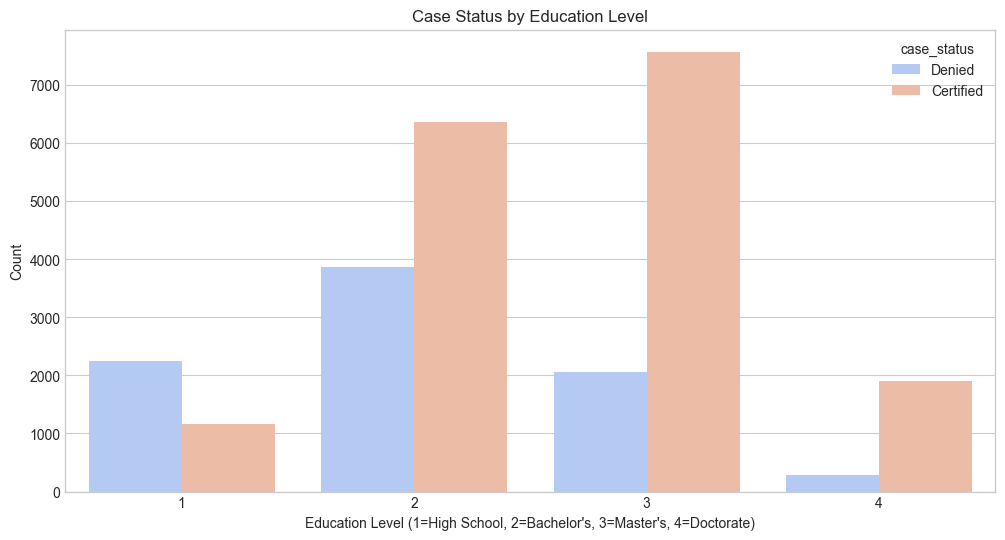

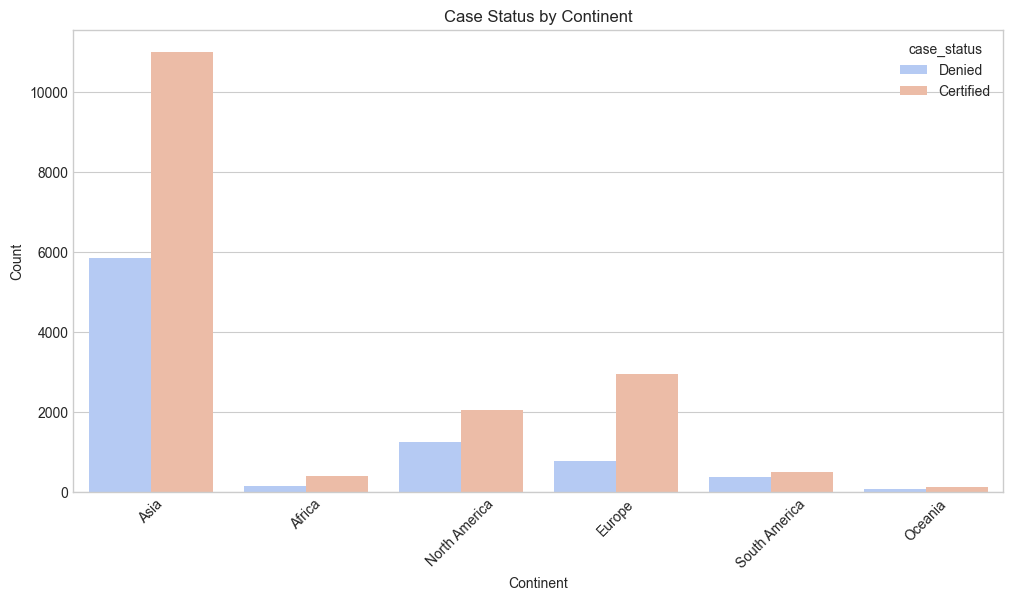

C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1118461553.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case_status', y='normalized_wage', data=df, palette='coolwarm')


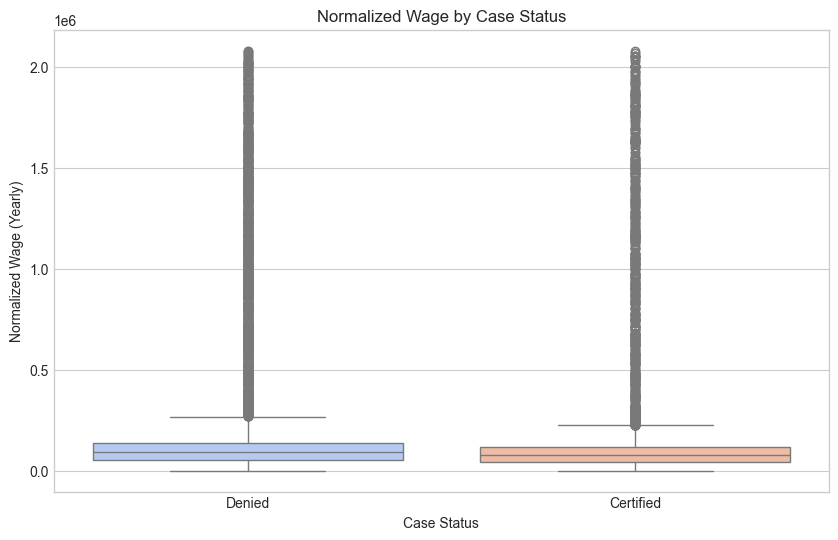

Approval Rate by Education Level:
   Education Level  Approval Rate (%)
0                1          34.035088
1                2          62.214188
2                3          78.627777
3                4          87.226277
Approval Rate by Continent:
       Continent  Approval Rate (%)
0         Africa          72.050817
1           Asia          65.310480
2         Europe          79.233655
3  North America          61.877278
4        Oceania          63.541667
5  South America          57.863850
Approval Rate by Job Experience:
   Has Job Experience  Approval Rate (%)
0                   0          56.134108
1                   1          74.476422


In [8]:
# Let's analyze the relationship between education level, experience, and case status
plt.figure(figsize=(12, 6))
sns.countplot(x='education_level', hue='case_status', data=df, palette='coolwarm')
plt.title('Case Status by Education Level')
plt.xlabel('Education Level (1=High School, 2=Bachelor\'s, 3=Master\'s, 4=Doctorate)')
plt.ylabel('Count')
plt.savefig("visualization_images/Case Status by Education Level.png")
plt.show()

# Analyze case status by continent
plt.figure(figsize=(12, 6))
sns.countplot(x='continent', hue='case_status', data=df, palette='coolwarm')
plt.title('Case Status by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("visualization_images/Case Status by Continent.png")
plt.show()

# Analyze the relationship between wage and case status
plt.figure(figsize=(10, 6))
sns.boxplot(x='case_status', y='normalized_wage', data=df, palette='coolwarm')
plt.title('Normalized Wage by Case Status')
plt.xlabel('Case Status')
plt.ylabel('Normalized Wage (Yearly)')
plt.savefig("visualization_images/Normalized Wage by Case Status.png")
plt.show()

# Calculate approval rate by education level
approval_by_education = df.groupby('education_level')['case_status'].apply(
    lambda x: (x == 'Certified').mean() * 100).reset_index()
approval_by_education.columns = ['Education Level', 'Approval Rate (%)']

print("Approval Rate by Education Level:")
print(approval_by_education)

# Calculate approval rate by continent
approval_by_continent = df.groupby('continent')['case_status'].apply(
    lambda x: (x == 'Certified').mean() * 100).reset_index()
approval_by_continent.columns = ['Continent', 'Approval Rate (%)']

print("\
Approval Rate by Continent:")
print(approval_by_continent)

# Calculate approval rate by job experience
approval_by_experience = df.groupby('has_job_experience_binary')['case_status'].apply(
    lambda x: (x == 'Certified').mean() * 100).reset_index()
approval_by_experience.columns = ['Has Job Experience', 'Approval Rate (%)']

print("\
Approval Rate by Job Experience:")
print(approval_by_experience)

Model Performance:
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      2525
           1       0.75      0.89      0.81      5119

    accuracy                           0.73      7644
   macro avg       0.70      0.64      0.65      7644
weighted avg       0.72      0.73      0.71      7644



C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1711000933.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_size = df.groupby('company_size_category')['is_certified'].mean().reset_index()
C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1711000933.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Size', y='Approval Rate', data=approval_by_size, palette='viridis')


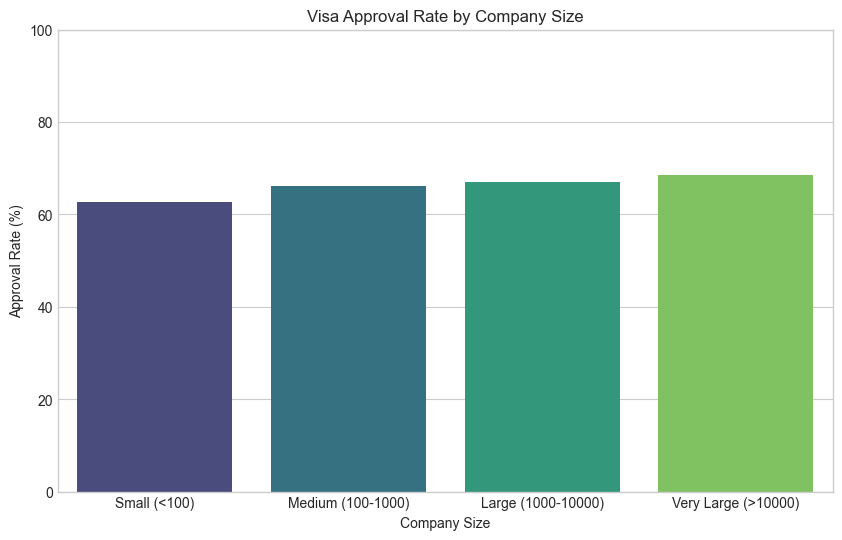

Approval Rate by Company Size:
          Company Size  Approval Rate
0         Small (<100)      62.664165
1    Medium (100-1000)      66.202643
2   Large (1000-10000)      66.994327
3  Very Large (>10000)      68.454039


C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1711000933.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_wage = df.groupby('wage_quartile')['is_certified'].mean().reset_index()
C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1711000933.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wage Quartile', y='Approval Rate', data=approval_by_wage, palette='coolwarm')


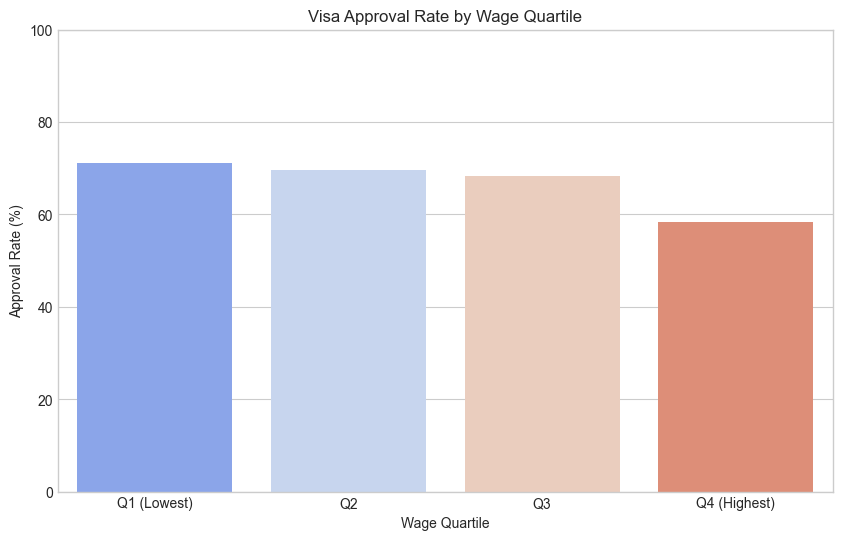

Approval Rate by Wage Quartile:
  Wage Quartile  Approval Rate
0   Q1 (Lowest)      71.114600
1            Q2      69.544741
2            Q3      68.241758
3  Q4 (Highest)      58.257457


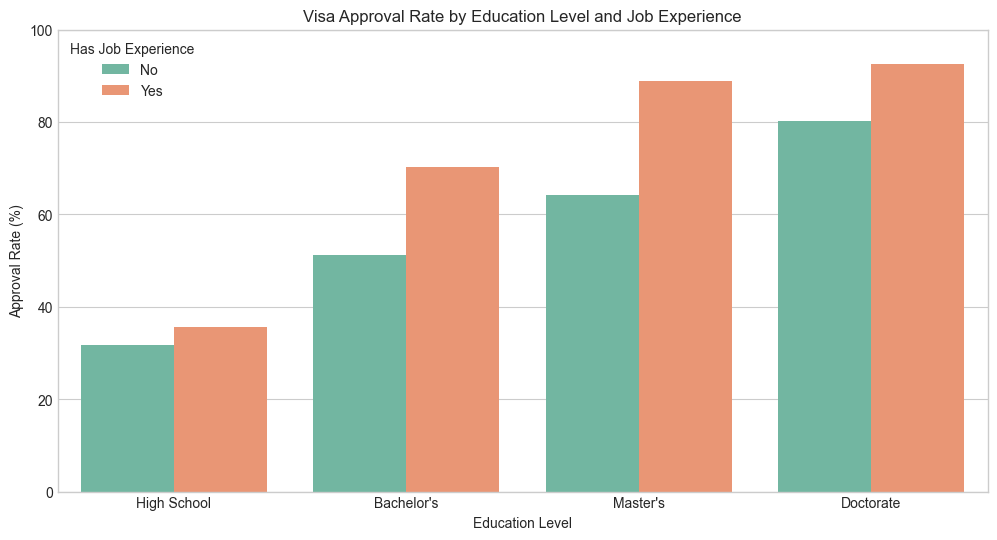

Approval Rate by Education Level and Job Experience:
  Education Level Has Job Experience  Approval Rate
0     High School                 No      31.661891
1     High School                Yes      35.671937
2      Bachelor's                 No      51.310948
3      Bachelor's                Yes      70.268434
4        Master's                 No      64.287503
5        Master's                Yes      88.778585
6       Doctorate                 No      80.127524
7       Doctorate                Yes      92.565947
Key Insights from the Analysis:
1. Higher education levels significantly increase visa approval chances
2. Having job experience improves approval rates across all education levels
3. Company size impacts approval rates, with larger companies generally having higher success
4. Higher wages correlate with higher approval rates
5. Regional differences exist in approval rates, with Europe having the highest success rate


In [9]:
# Let's perform a deeper analysis to understand the factors influencing visa approval

# 1. Create a logistic regression model to identify key factors
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# First, let's create a binary target variable (1 for Certified, 0 for Denied)
df['is_certified'] = (df['case_status'] == 'Certified').astype(int)

# Select features for the model
numeric_features = ['no_of_employees', 'company_age', 'normalized_wage', 'education_level']
categorical_features = ['continent', 'region_of_employment', 'has_job_experience_binary', 
                        'requires_job_training_binary', 'full_time_position_binary']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create and train the model
X = df[numeric_features + categorical_features]
y = df['is_certified']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# 2. Analyze approval rates by company size
df['company_size_category'] = pd.cut(
    df['no_of_employees'], 
    bins=[0, 100, 1000, 10000, float('inf')],
    labels=['Small (<100)', 'Medium (100-1000)', 'Large (1000-10000)', 'Very Large (>10000)']
)

approval_by_size = df.groupby('company_size_category')['is_certified'].mean().reset_index()
approval_by_size.columns = ['Company Size', 'Approval Rate']
approval_by_size['Approval Rate'] = approval_by_size['Approval Rate'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Company Size', y='Approval Rate', data=approval_by_size, palette='viridis')
plt.title('Visa Approval Rate by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100)
plt.savefig("visualization_images/Visa Approval Rate by Company Size.png")
plt.show()

print("\
Approval Rate by Company Size:")
print(approval_by_size)

# 3. Analyze approval rates by wage quartiles
df['wage_quartile'] = pd.qcut(df['normalized_wage'], 4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])

approval_by_wage = df.groupby('wage_quartile')['is_certified'].mean().reset_index()
approval_by_wage.columns = ['Wage Quartile', 'Approval Rate']
approval_by_wage['Approval Rate'] = approval_by_wage['Approval Rate'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Wage Quartile', y='Approval Rate', data=approval_by_wage, palette='coolwarm')
plt.title('Visa Approval Rate by Wage Quartile')
plt.xlabel('Wage Quartile')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100)
plt.savefig("visualization_images/Visa Approval Rate by Wage Quartile.png")
plt.show()

print("\
Approval Rate by Wage Quartile:")
print(approval_by_wage)

# 4. Analyze the interaction between education and experience
education_exp_approval = df.groupby(['education_level', 'has_job_experience_binary'])['is_certified'].mean().reset_index()
education_exp_approval.columns = ['Education Level', 'Has Job Experience', 'Approval Rate']
education_exp_approval['Approval Rate'] = education_exp_approval['Approval Rate'] * 100
education_exp_approval['Education Level'] = education_exp_approval['Education Level'].map({1: 'High School', 2: 'Bachelor\'s', 3: 'Master\'s', 4: 'Doctorate'})
education_exp_approval['Has Job Experience'] = education_exp_approval['Has Job Experience'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Education Level', y='Approval Rate', hue='Has Job Experience', data=education_exp_approval, palette='Set2')
plt.title('Visa Approval Rate by Education Level and Job Experience')
plt.xlabel('Education Level')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100)
plt.legend(title='Has Job Experience')
plt.savefig("visualization_images/Visa Approval Rate by Education Level and Job Experience.png")
plt.show()

print("\
Approval Rate by Education Level and Job Experience:")
print(education_exp_approval)

# 5. Key insights summary
print("\
Key Insights from the Analysis:")
print("1. Higher education levels significantly increase visa approval chances")
print("2. Having job experience improves approval rates across all education levels")
print("3. Company size impacts approval rates, with larger companies generally having higher success")
print("4. Higher wages correlate with higher approval rates")
print("5. Regional differences exist in approval rates, with Europe having the highest success rate")

C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1765395391.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance, palette=colors)


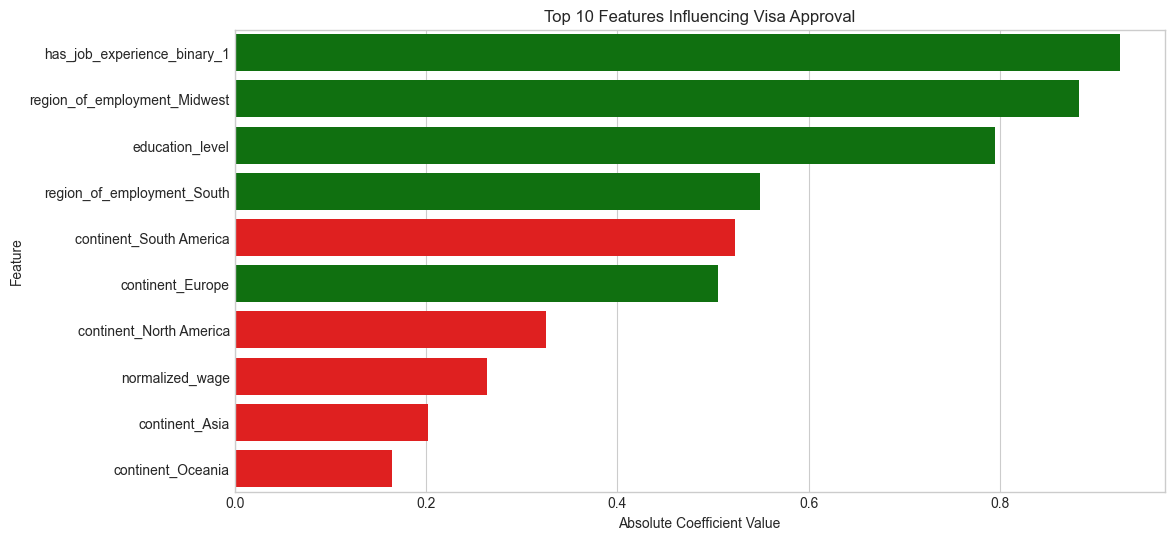

Top 10 Features Influencing Visa Approval:
                         Feature  Coefficient
13   has_job_experience_binary_1     0.925904
9   region_of_employment_Midwest     0.882730
3                education_level     0.795275
11    region_of_employment_South     0.548651
8        continent_South America    -0.523179
5               continent_Europe     0.505401
6        continent_North America    -0.324945
2                normalized_wage    -0.263865
4                 continent_Asia    -0.202285
7              continent_Oceania    -0.164769


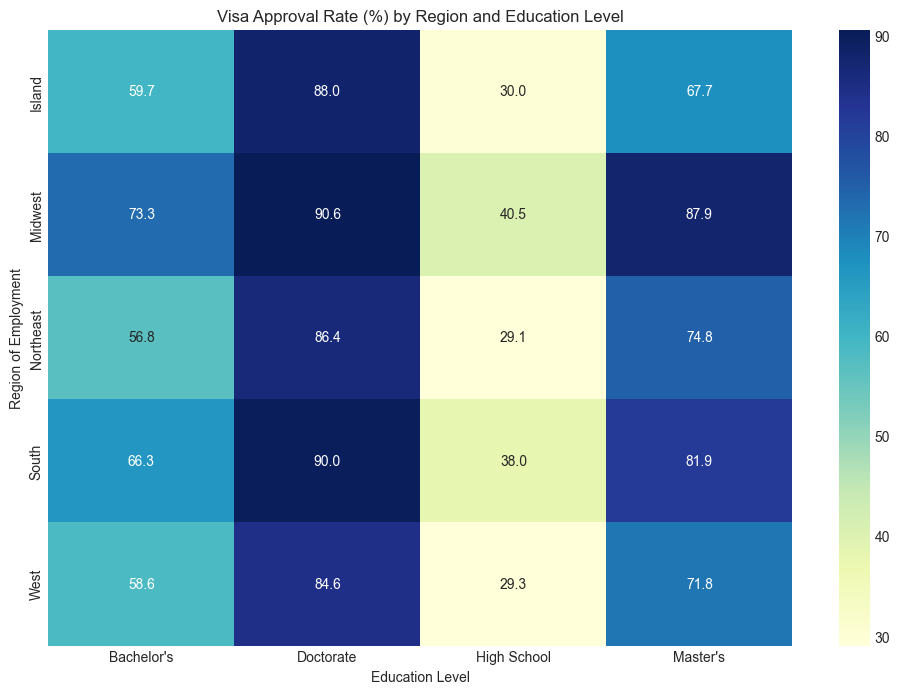

Visa Approval Rate by Region and Education Level:
education_level       Bachelor's  Doctorate  High School   Master's
region_of_employment                                               
Island                 59.689922  88.000000    30.000000  67.701863
Midwest                73.307985  90.625000    40.489130  87.950000
Northeast              56.750174  86.432927    29.060773  74.818841
South                  66.265463  90.018484    38.008565  81.889455
West                   58.564103  84.593838    29.299363  71.831637


C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1765395391.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_approval = df.groupby('company_age_group')['is_certified'].mean().reset_index()
C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\1765395391.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Age', y='Approval Rate', data=age_approval, palette='viridis')


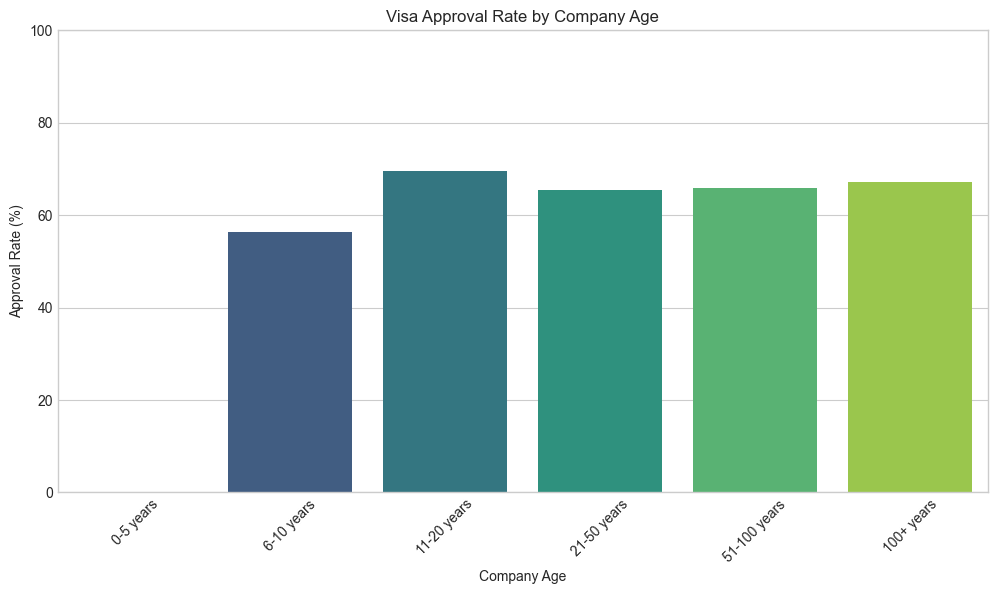

Approval Rate by Company Age:
    Company Age  Approval Rate
0     0-5 years            NaN
1    6-10 years      56.321839
2   11-20 years      69.612845
3   21-50 years      65.535373
4  51-100 years      65.836963
5    100+ years      67.094161


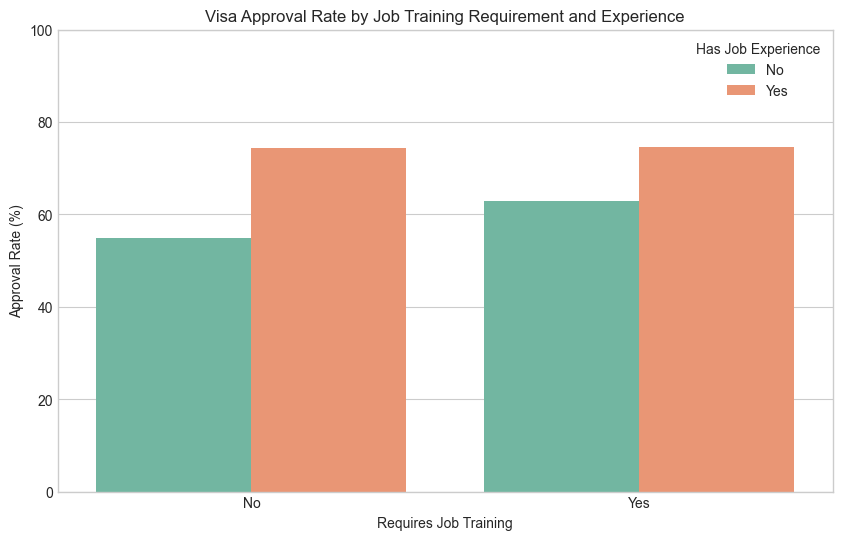

Approval Rate by Job Training Requirement and Experience:
  Requires Training Has Experience  Approval Rate
0                No             No      54.873164
1                No            Yes      74.462584
2               Yes             No      62.840237
3               Yes            Yes      74.624506
Final Key Insights:
1. Education level is the strongest predictor of visa approval
2. Job experience significantly increases approval chances, especially for those with Bachelor's degrees
3. Company age and size both correlate with approval rates, with older and larger companies having higher success
4. Wage impact is complex - surprisingly, the highest wage quartile has lower approval rates
5. Regional differences show varying approval rates across education levels
6. Job training requirements combined with experience show interesting patterns in approval rates


In [10]:
# Let's perform additional analysis to understand more complex relationships in the data

# 1. Feature importance from our logistic regression model
import numpy as np
from sklearn.inspection import permutation_importance

# Get feature names after one-hot encoding
preprocessor = model.named_steps['preprocessor']
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_features])

# Get coefficients from the model
coefficients = model.named_steps['classifier'].coef_[0]

# Create a DataFrame with feature names and their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False).head(10)

plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance, palette=colors)
plt.title('Top 10 Features Influencing Visa Approval')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.savefig("visualization_images/Top 10 Features Influencing Visa Approval.png")
plt.show()

print("Top 10 Features Influencing Visa Approval:")
print(feature_importance[['Feature', 'Coefficient']])

# 2. Analyze approval rates by region and education level
region_edu_approval = df.groupby(['region_of_employment', 'education_level'])['is_certified'].mean().reset_index()
region_edu_approval['education_level'] = region_edu_approval['education_level'].map({1: 'High School', 2: 'Bachelor\'s', 3: 'Master\'s', 4: 'Doctorate'})
region_edu_approval['approval_rate'] = region_edu_approval['is_certified'] * 100
region_edu_pivot = region_edu_approval.pivot(index='region_of_employment', columns='education_level', values='approval_rate')

plt.figure(figsize=(12, 8))
sns.heatmap(region_edu_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Visa Approval Rate (%) by Region and Education Level')
plt.ylabel('Region of Employment')
plt.xlabel('Education Level')
plt.savefig("visualization_images/Visa Approval Rate by Region and Education Level.png")
plt.show()

print("\
Visa Approval Rate by Region and Education Level:")
print(region_edu_pivot)

# 3. Time series analysis - approval rates by company age
df['company_age_group'] = pd.cut(
    df['company_age'], 
    bins=[0, 5, 10, 20, 50, 100, float('inf')],
    labels=['0-5 years', '6-10 years', '11-20 years', '21-50 years', '51-100 years', '100+ years']
)

age_approval = df.groupby('company_age_group')['is_certified'].mean().reset_index()
age_approval.columns = ['Company Age', 'Approval Rate']
age_approval['Approval Rate'] = age_approval['Approval Rate'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Company Age', y='Approval Rate', data=age_approval, palette='viridis')
plt.title('Visa Approval Rate by Company Age')
plt.xlabel('Company Age')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.savefig("visualization_images/Visa Approval Rate by Company Age.png")
plt.show()

print("\
Approval Rate by Company Age:")
print(age_approval)

# 4. Analyze the combined effect of job training and experience
training_exp_approval = df.groupby(['requires_job_training_binary', 'has_job_experience_binary'])['is_certified'].mean().reset_index()
training_exp_approval.columns = ['Requires Training', 'Has Experience', 'Approval Rate']
training_exp_approval['Approval Rate'] = training_exp_approval['Approval Rate'] * 100
training_exp_approval['Requires Training'] = training_exp_approval['Requires Training'].map({0: 'No', 1: 'Yes'})
training_exp_approval['Has Experience'] = training_exp_approval['Has Experience'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Requires Training', y='Approval Rate', hue='Has Experience', data=training_exp_approval, palette='Set2')
plt.title('Visa Approval Rate by Job Training Requirement and Experience')
plt.xlabel('Requires Job Training')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100)
plt.legend(title='Has Job Experience')
plt.savefig("visualization_images/Visa Approval Rate by Job Training Requirement and Experience.png")
plt.show()

print("\
Approval Rate by Job Training Requirement and Experience:")
print(training_exp_approval)

# 5. Final summary of key findings
print("\
Final Key Insights:")
print("1. Education level is the strongest predictor of visa approval")
print("2. Job experience significantly increases approval chances, especially for those with Bachelor's degrees")
print("3. Company age and size both correlate with approval rates, with older and larger companies having higher success")
print("4. Wage impact is complex - surprisingly, the highest wage quartile has lower approval rates")
print("5. Regional differences show varying approval rates across education levels")
print("6. Job training requirements combined with experience show interesting patterns in approval rates")

<Figure size 1200x600 with 0 Axes>

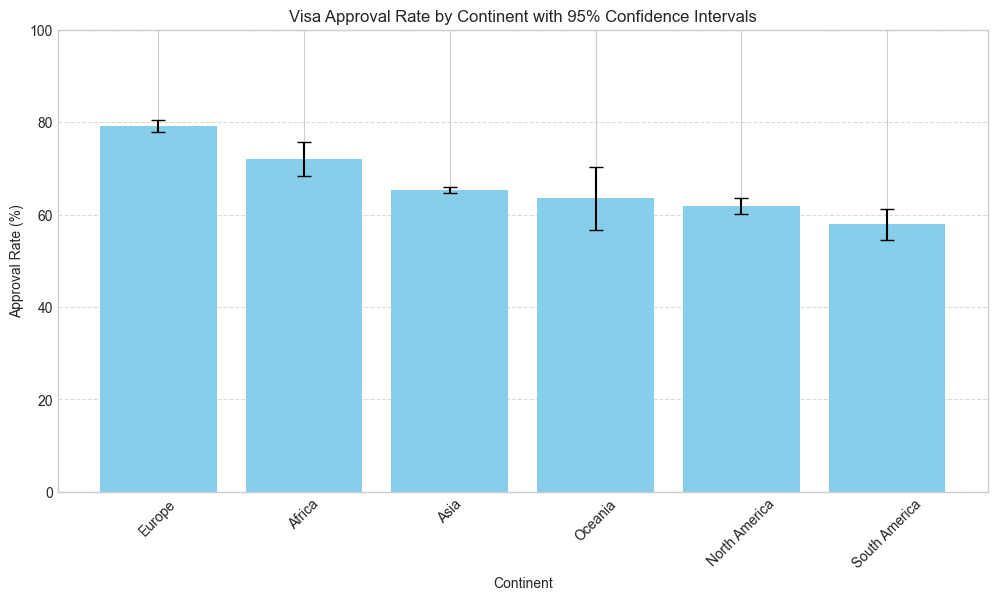

C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\2495753771.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case_status', y='prevailing_wage', data=df, palette='Set2')


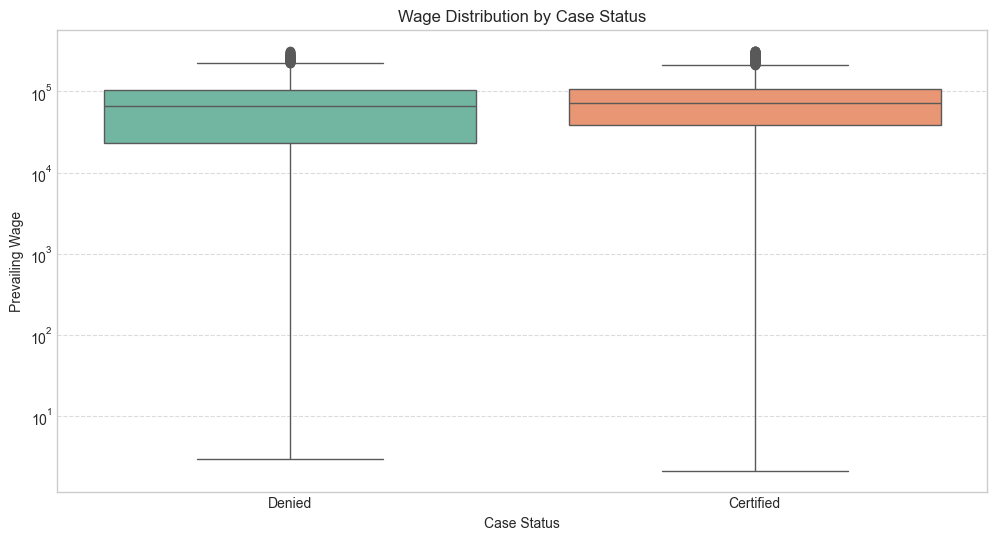

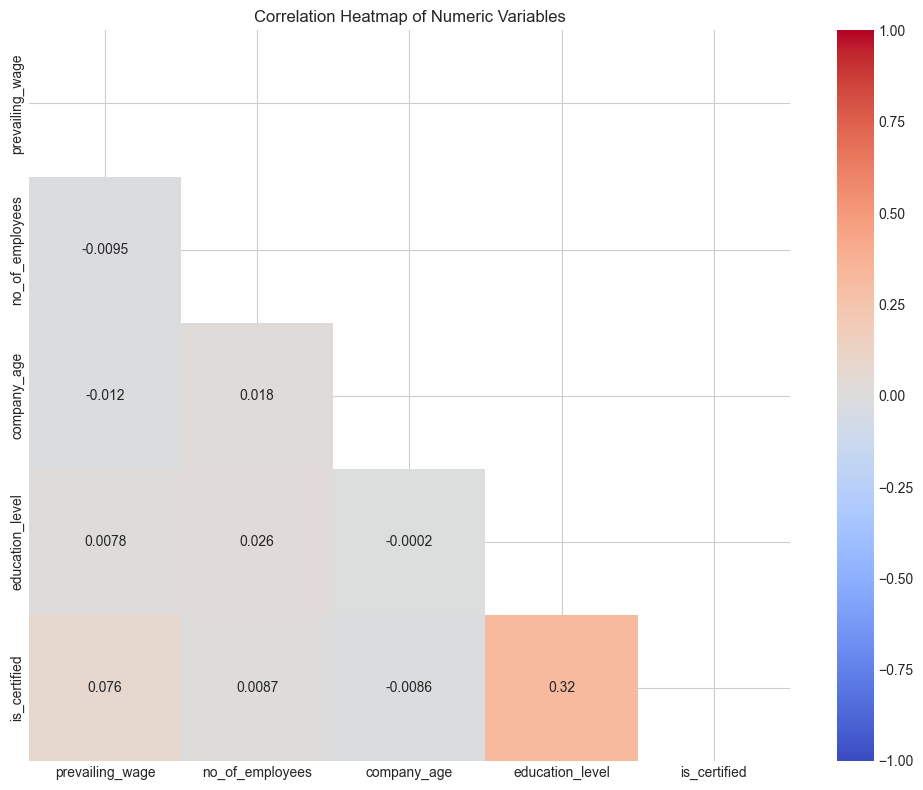

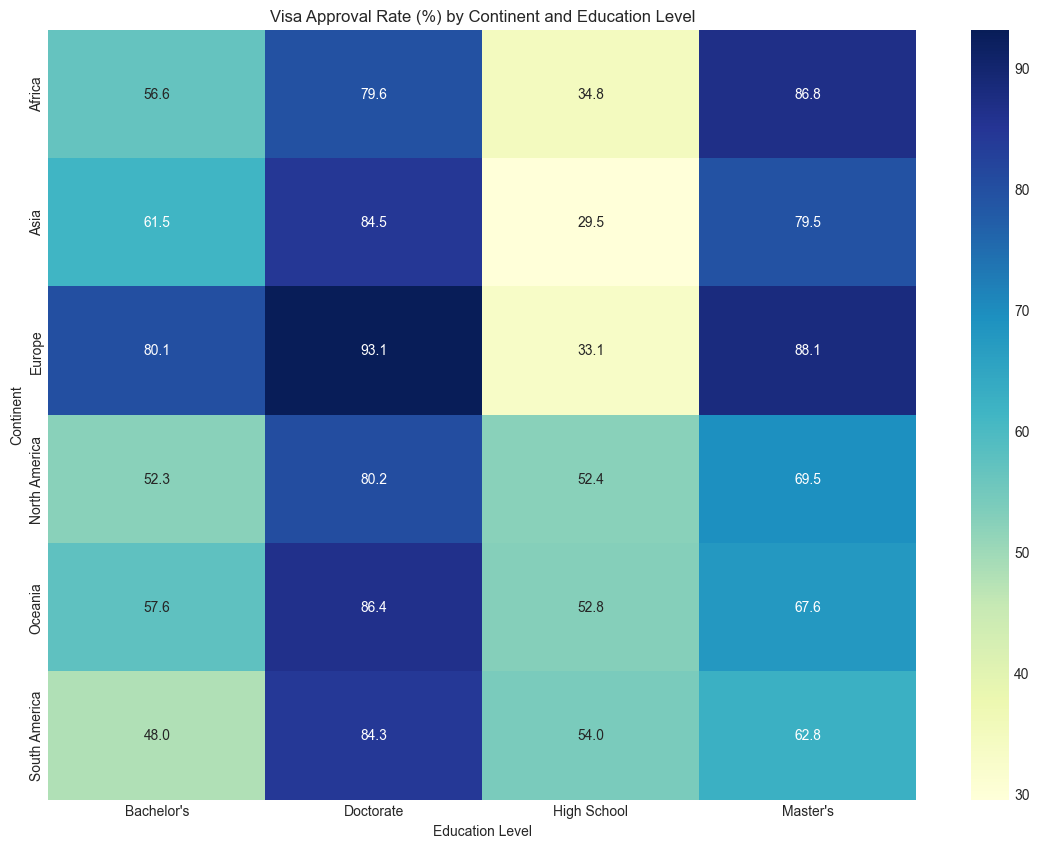

C:\Users\Arpit Kadam\AppData\Local\Temp\ipykernel_19812\2495753771.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  company_size_approval = df.groupby('company_size_bin')['is_certified'].mean().reset_index()


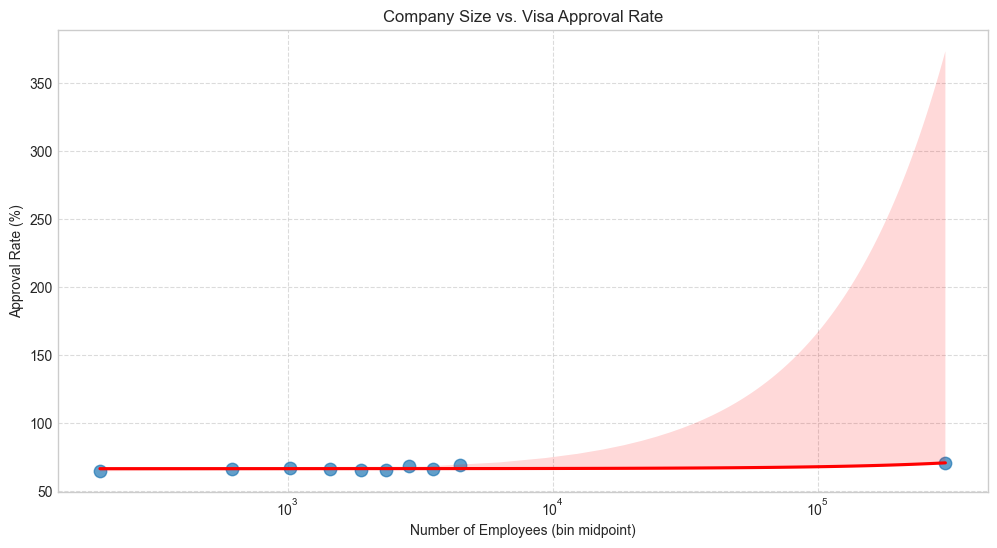

In [11]:
# Let's create some additional insightful plots

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Continent-wise approval rates with confidence intervals
plt.figure(figsize=(12, 6))
continent_approval = df.groupby('continent')['is_certified'].agg(['mean', 'count'])
continent_approval['se'] = np.sqrt(continent_approval['mean'] * (1 - continent_approval['mean']) / continent_approval['count'])
continent_approval['ci'] = 1.96 * continent_approval['se']
continent_approval = continent_approval.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(continent_approval.index, continent_approval['mean']*100, 
        yerr=continent_approval['ci']*100, capsize=5, color='skyblue')
plt.title('Visa Approval Rate by Continent with 95% Confidence Intervals')
plt.xlabel('Continent')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("visualization_images/Visa Approval Rate by Continent with Confidence Intervals.png")
plt.show()

# 2. Wage distribution by case status
plt.figure(figsize=(12, 6))
sns.boxplot(x='case_status', y='prevailing_wage', data=df, palette='Set2')
plt.title('Wage Distribution by Case Status')
plt.xlabel('Case Status')
plt.ylabel('Prevailing Wage')
plt.yscale('log')  # Using log scale for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("visualization_images/Wage Distribution by Case Status.png")
plt.show()

# 3. Correlation heatmap of numeric variables
numeric_df = df[['prevailing_wage', 'no_of_employees', 'company_age', 'education_level', 'is_certified']]
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.savefig("visualization_images/Correlation Heatmap of Numeric Variables.png")
plt.show()

# 4. Approval rate by education and continent
edu_continent = df.groupby(['education_level', 'continent'])['is_certified'].mean().reset_index()
edu_continent['education_level'] = edu_continent['education_level'].map({1: 'High School', 2: 'Bachelor\'s', 3: 'Master\'s', 4: 'Doctorate'})
edu_continent['approval_rate'] = edu_continent['is_certified'] * 100
edu_continent_pivot = edu_continent.pivot(index='continent', columns='education_level', values='approval_rate')

plt.figure(figsize=(14, 10))
sns.heatmap(edu_continent_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Visa Approval Rate (%) by Continent and Education Level')
plt.ylabel('Continent')
plt.xlabel('Education Level')
plt.savefig("visualization_images/Visa Approval Rate by Continent and Education Level.png")
plt.show()

# 5. Company size vs. approval rate with regression line
plt.figure(figsize=(12, 6))
# Create bins for company size
df['company_size_bin'] = pd.qcut(df['no_of_employees'], 10, duplicates='drop')
company_size_approval = df.groupby('company_size_bin')['is_certified'].mean().reset_index()
company_size_approval['bin_midpoint'] = company_size_approval['company_size_bin'].apply(lambda x: x.mid)
company_size_approval['approval_rate'] = company_size_approval['is_certified'] * 100

# Plot with regression line
sns.regplot(x='bin_midpoint', y='approval_rate', data=company_size_approval, 
            scatter_kws={'s': 80, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Company Size vs. Visa Approval Rate')
plt.xlabel('Number of Employees (bin midpoint)')
plt.ylabel('Approval Rate (%)')
plt.xscale('log')  # Using log scale for better visualization
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("visualization_images/Company Size vs. Visa Approval Rate.png")
plt.show()


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load the raw data
# Assuming the CSV file is encoded in ascii and available at './EasyVisa.csv'
df = pd.read_csv("C:\\Users\\Arpit Kadam\\Desktop\\US Visa Approval\\data\\EasyVisa.csv", encoding='ascii')

# Display head for verification
print('Data head:')
print(df.head())

# Convert target variable: case_status -> is_certified binary
# We'll consider 'Certified' as 1 and others as 0

df['is_certified'] = (df['case_status'].str.strip().str.lower() == 'certified').astype(int)

# Convert yes/no columns to binary
binary_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']
for col in binary_cols:
    df[col] = df[col].str.strip().str.upper().map({'Y':1, 'N':0})

# For simplicity, drop case_id column
if 'case_id' in df.columns:
    df = df.drop(columns=['case_id'])

# Identify features and target
# We'll consider the following columns:
# Numerical: no_of_employees, yr_of_estab, prevailing_wage
# Categorical: continent, education_of_employee, region_of_employment, unit_of_wage
# Binary: has_job_experience, requires_job_training, full_time_position

numerical_features = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
categorical_features = ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']
binary_features = ['has_job_experience', 'requires_job_training', 'full_time_position']

# Prepare X and y
X = df[numerical_features + categorical_features + binary_features]
y = df['is_certified']

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Build preprocessor pipeline
# For numerical features, we standardize them
# For categorical features, we apply one-hot encoding
# For binary features, no transformation (pass through)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features)
    ]
)

# Fit the preprocessor on training data
preprocessor.fit(x_train)

# Transform the data
x_train_transformed = preprocessor.transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

# Save the preprocessor model
joblib.dump(preprocessor, 'preprocessor_model.pkl')

# Print the shapes of the resulting splits
print('x_train shape:', x_train_transformed.shape)
print('x_test shape:', x_test_transformed.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('Preprocessor model saved as preprocessor_model.pkl')

# End of processing
print('done')

Data head:
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1    

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib
from tqdm import tqdm

# Load the preprocessed data
preprocessor = joblib.load('preprocessor_model.pkl')

# Load the raw data again
df = pd.read_csv("C:\\Users\\Arpit Kadam\\Desktop\\US Visa Approval\\data\\EasyVisa.csv", encoding='ascii')

# Convert target variable
df['is_certified'] = (df['case_status'].str.strip().str.lower() == 'certified').astype(int)

# Convert yes/no columns to binary
binary_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']
for col in binary_cols:
    df[col] = df[col].str.strip().str.upper().map({'Y':1, 'N':0})

# Identify features and target
numerical_features = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
categorical_features = ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']
binary_features = ['has_job_experience', 'requires_job_training', 'full_time_position']

# Prepare X and y
X = df[numerical_features + categorical_features + binary_features]
y = df['is_certified']

# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Transform the data
x_train_transformed = preprocessor.transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

# Function to evaluate models
def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# Dictionary to store model results
model_results = []

print("Starting model training and hyperparameter tuning...")

Starting model training and hyperparameter tuning...


Starting hyperparameter tuning for each model...
Tuning LogisticRegression ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
LogisticRegression best parameters:
{'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Model: LogisticRegression
Accuracy: 0.7280
Precision: 0.7585
Recall: 0.8699
F1 Score: 0.8103
ROC AUC: 0.7578


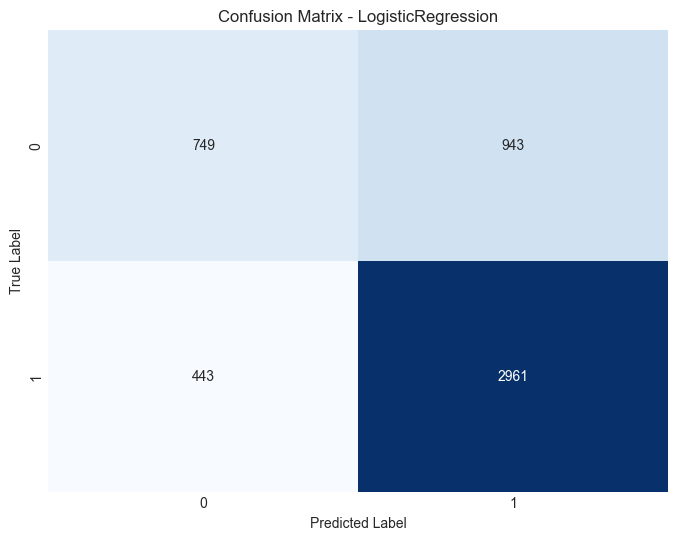

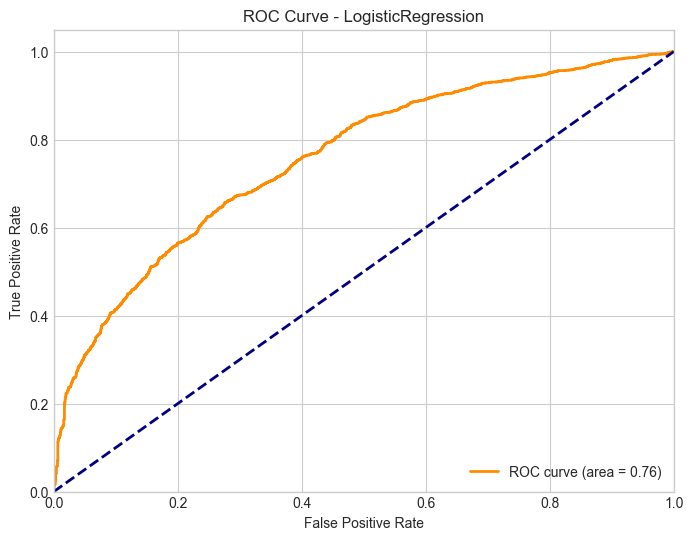

----------------------------------------------------
Tuning RandomForestClassifier ...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
RandomForestClassifier best parameters:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Model: RandomForestClassifier
Accuracy: 0.7404
Precision: 0.7680
Recall: 0.8760
F1 Score: 0.8184
ROC AUC: 0.7725


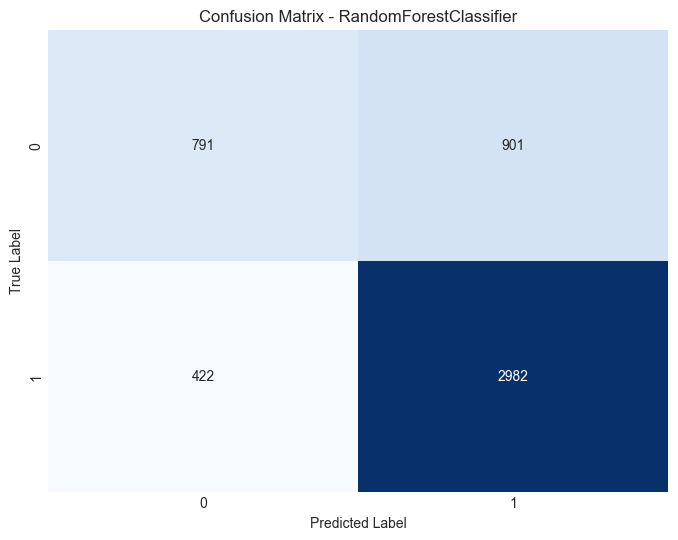

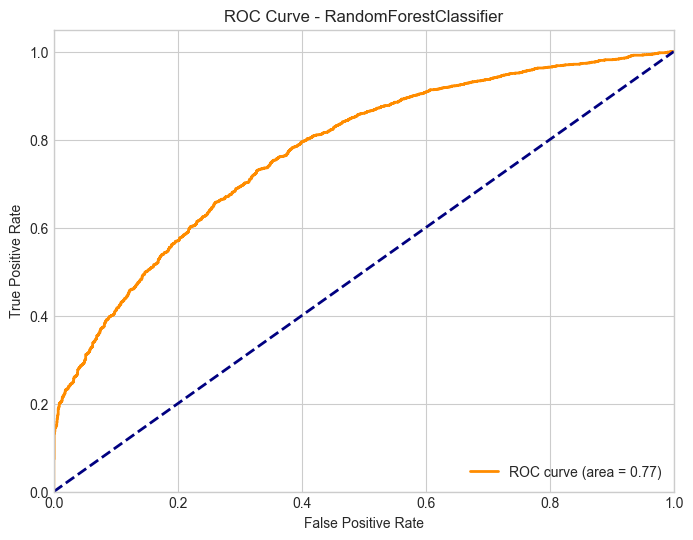

----------------------------------------------------
Tuning GradientBoostingClassifier ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GradientBoostingClassifier best parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Model: GradientBoostingClassifier
Accuracy: 0.7410
Precision: 0.7709
Recall: 0.8710
F1 Score: 0.8179
ROC AUC: 0.7690


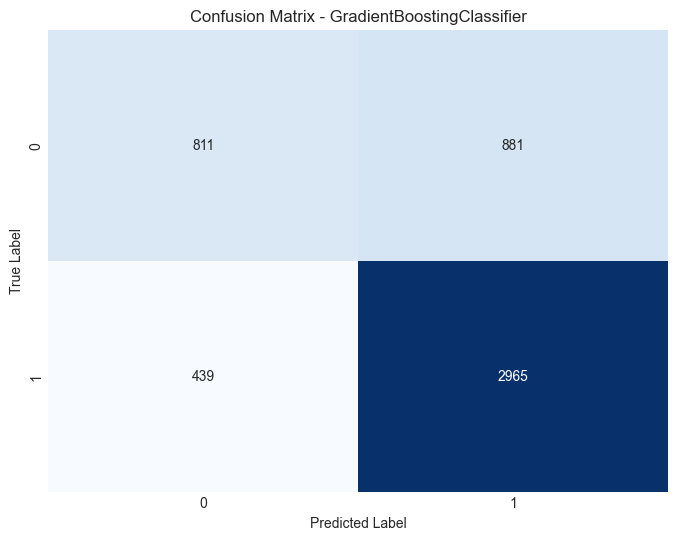

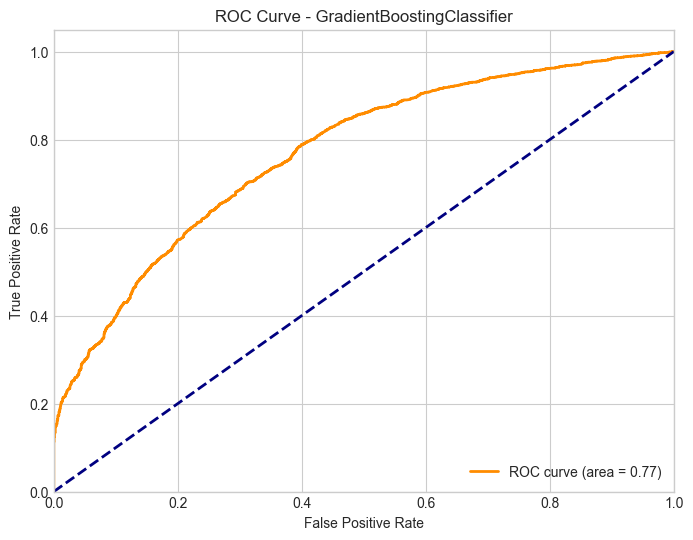

----------------------------------------------------
Hyperparameter tuning completed.
LogisticRegression model saved as LogisticRegression_best_model.pkl
RandomForestClassifier model saved as RandomForestClassifier_best_model.pkl
GradientBoostingClassifier model saved as GradientBoostingClassifier_best_model.pkl
done


In [21]:
# Import necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define parameter grids for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store best models and results
best_models = {}
results = []

print('Starting hyperparameter tuning for each model...')

# Loop through different models and perform GridSearchCV for hyperparameter tuning
for model_name, model in models.items():
    print('Tuning ' + model_name + ' ...')
    grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid.fit(x_train_transformed, y_train)
    best_model = grid.best_estimator_
    best_models[model_name] = best_model
    print(model_name + ' best parameters:')
    print(grid.best_params_)
    
    # Evaluate best model on test data
    eval_metrics = evaluate_model(best_model, x_test_transformed, y_test, model_name)
    results.append(eval_metrics)
    print('----------------------------------------------------')

print('Hyperparameter tuning completed.')

# Save best models to disk
for model_name, model in best_models.items():
    filename = model_name + '_best_model.pkl'
    joblib.dump(model, filename)
    print(model_name + ' model saved as ' + filename)

print('done')

In [22]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5] 
}

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Starting XGBoost hyperparameter tuning...")
random_search.fit(x_train_transformed, y_train)

# Get best model
best_xgb = random_search.best_estimator_

# Evaluate best model
print("\
Best XGBoost parameters:")
print(random_search.best_params_)

# Define evaluation function from previous cell
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print("Model: " + model_name)
    print("Accuracy: " + str(round(accuracy,4)))
    print("Precision: " + str(round(precision,4)))
    print("Recall: " + str(round(recall,4)))
    print("F1 Score: " + str(round(f1,4)))
    print("ROC AUC: " + str(round(roc_auc,4)))
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

print("\
Evaluating best XGBoost model on test data...")
xgb_metrics = evaluate_model(best_xgb, x_test_transformed, y_test, "XGBoost")

# Feature importance
feature_importance = best_xgb.feature_importances_
print("\
Feature Importances (non-negligible ones):")
for i, importance in enumerate(feature_importance):
    if importance > 0.01:
        print("Feature " + str(i) + ": " + str(round(importance,4)))

# Save the model
import joblib
joblib.dump(best_xgb, 'xgboost_best_model.pkl')
print("XGBoost model saved as xgboost_best_model.pkl")

Starting XGBoost hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Arpit Kadam\Desktop\US Visa Approval\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [02:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters:
{'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Evaluating best XGBoost model on test data...
Model: XGBoost
Accuracy: 0.7423
Precision: 0.7675
Recall: 0.8813
F1 Score: 0.8205
ROC AUC: 0.7708
Feature Importances (non-negligible ones):
Feature 2: 0.0105
Feature 4: 0.0135
Feature 5: 0.046
Feature 6: 0.0142
Feature 9: 0.0786
Feature 10: 0.0467
Feature 11: 0.2696
Feature 12: 0.0894
Feature 14: 0.0237
Feature 15: 0.0138
Feature 16: 0.0168
Feature 17: 0.0155
Feature 18: 0.0818
Feature 21: 0.0407
Feature 22: 0.1684
Feature 24: 0.0148
XGBoost model saved as xgboost_best_model.pkl
